# German credit fraud

http://weka.8497.n7.nabble.com/file/n23121/credit_fruad.arff

Professor Dr. Hans Hofmann

Institut fur Statistik und Okonometrie Universitat Hamburg  
FB Wirtschaftswissenschaften  
Von-Melle-Park 5  
2000 Hamburg 13

---

## Prediction

The initial dataset is accompanied with the following cost matrix

|  out   |  good  |  bad  |
|  ---   |  ---   |  ---  |
|  good  |   0    |   1   |
|  bad   |   5    |   0   |

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).

#### Contents
[Logistic regression](#Logistic-regression)  
[Gradient boosting](#Gradient-boosting)  

In [1]:
%%html
<link rel="stylesheet" href="custom.css"/>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import downsample, train, calculate_metrics, visualize_metrics
from sklearn.model_selection import (train_test_split, StratifiedKFold, GridSearchCV)

Since the dataset is imbalanced we'll apply a downsampling technique with subsequent bootstrapping of the majority class.

In [17]:
X, X_test, y, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.25)

In [18]:
X.shape

(750, 20)

### Logistic regression

In [ ]:
# %%time

# Train
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

models_lr = list(train(X, y, lr, params, 100))


True Positives: 70.3%
True Negatives: 68.6%
False Positives: 31.4%
False Negatives: 29.7%

Accuracy: 69.3
Precision: 69.4
Recall: 70.3
Area under the curve: 0.762


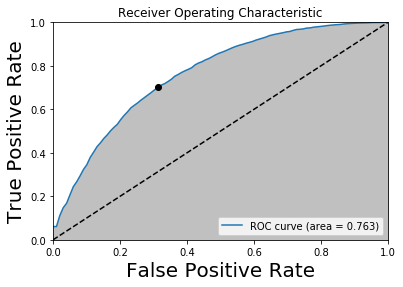

In [112]:
# Visualize mean metrics
metrics_lr = list(calculate_metrics(models_lr, 0.5))
visualize_metrics(metrics_lr)


True Positives: 88.7%
True Negatives: 77.0%
False Positives: 23.0%
False Negatives: 11.3%

Accuracy: 82.4
Precision: 76.4
Recall: 88.7
Area under the curve: 0.890


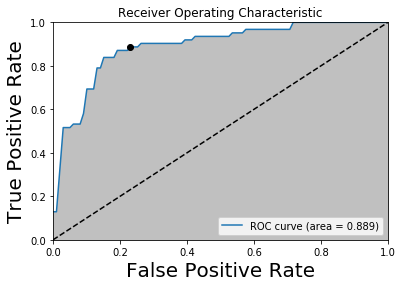

In [113]:
# Get the best classifier
best_ix = np.argmax([m['roc_auc'] for m in metrics_lr])
best_estimator = models_lr[best_ix]['estimator']
visualize_metrics([metrics_lr[best_ix]])

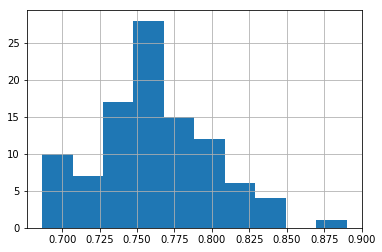

In [114]:
# Build classifier distribution
pd.Series([m['roc_auc'] for m in metrics_lr]).hist();

In [115]:
models_lr[best_ix]['estimator'].best_params_

{'C': 1}


True Positives: 77.0%
True Negatives: 70.5%
False Positives: 29.5%
False Negatives: 23.0%

Accuracy: 72.4
Precision: 52.3
Recall: 77.0
Area under the curve: 0.747


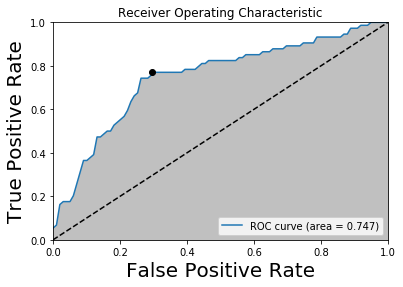

In [116]:
# Measure performance on the test set
best_model_lr = [{'estimator': best_estimator,
                  'y_test': y_test,
                  'y_pred_proba': best_estimator.predict_proba(X_test)[:, 1]}]

# Visualize the metrics
best_metrics_lr = list(calculate_metrics(best_model_lr, 0.5))
visualize_metrics(best_metrics_lr)

The model seems to overfit a lot at the CV stage.

---

### Gradient boosting

In [ ]:
# %%time

# Train
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
params = {'loss': ['exponential', 'deviance'],
          'n_estimators': [100, 200],
          'warm_start': [True],
          'max_depth': [4, 5]}
models_gb = list(train(X, y, gb, params, 100))


True Positives: 72.5%
True Negatives: 70.3%
False Positives: 29.7%
False Negatives: 27.5%

Accuracy: 71.2
Precision: 70.4
Recall: 72.5
Area under the curve: 0.790


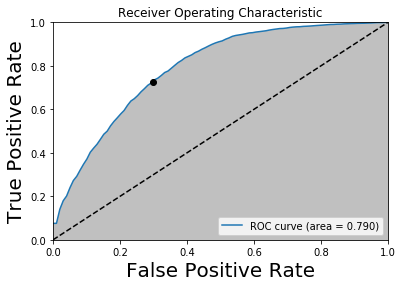

In [118]:
# Visualize mean metrics
metrics_gb = list(calculate_metrics(models_gb, 0.5))
visualize_metrics(metrics_gb)

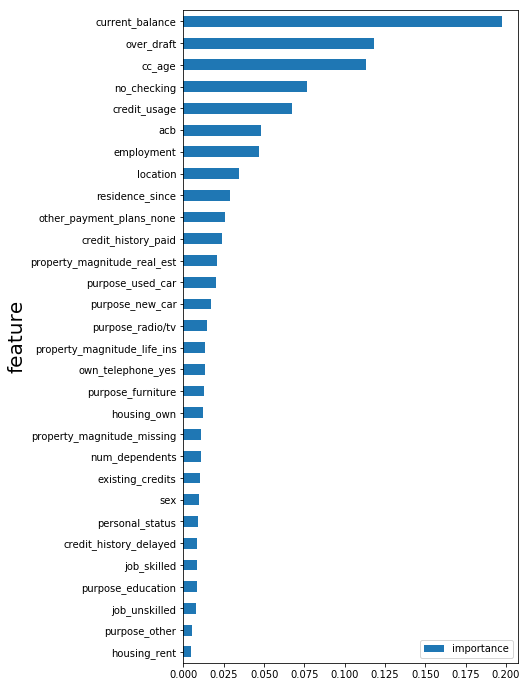

In [119]:
# Get feature importance
feature_imp = pd.DataFrame({'feature': list(X), 'importance': [round(x, 5) for x in np.mean([y['estimator'].best_estimator_.feature_importances_ for y in models_gb], axis=0)]})
feature_imp.set_index('feature', inplace=True)
feature_imp = feature_imp.sort_values(by='importance', ascending=True)
feature_imp.plot.barh(figsize=(6, 12));


True Positives: 83.3%
True Negatives: 78.9%
False Positives: 21.1%
False Negatives: 16.7%

Accuracy: 80.9
Precision: 75.8
Recall: 83.3
Area under the curve: 0.899


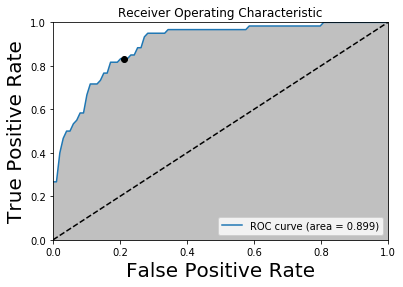

In [120]:
# Get the best classifier
best_ix = np.argmax([m['roc_auc'] for m in metrics_gb])
best_estimator = models_gb[best_ix]['estimator']
visualize_metrics([metrics_gb[best_ix]])

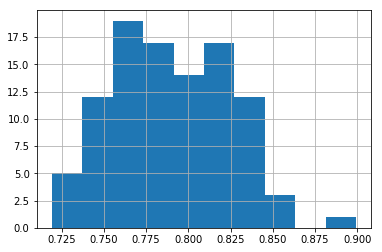

In [121]:
pd.Series([m['roc_auc'] for m in metrics_gb]).hist();

In [122]:
models_gb[best_ix]['estimator'].best_params_

{'loss': 'deviance', 'max_depth': 4, 'n_estimators': 200, 'warm_start': True}


True Positives: 73.0%
True Negatives: 62.5%
False Positives: 37.5%
False Negatives: 27.0%

Accuracy: 65.6
Precision: 45.0
Recall: 73.0
Area under the curve: 0.753


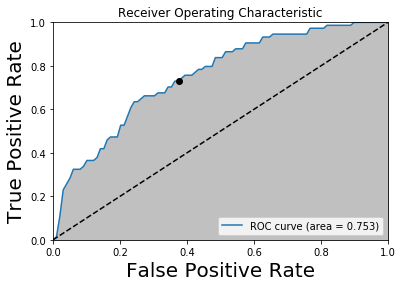

In [123]:
# Measure performance on the test set
best_model_gb = [{'estimator': best_estimator,
                  'y_test': y_test,
                  'y_pred_proba': best_estimator.predict_proba(X_test)[:, 1]}]

# Visualize the metrics
best_metrics_gb = list(calculate_metrics(best_model_gb, 0.5))
visualize_metrics(best_metrics_gb)

The model seems to overfit a lot at the CV stage.